In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
# dataframe = pd.read_csv('user-tweettexts',names=['user_id','tweets'],sep="\t")
dataframe = pd.read_csv('trial',names=['user_id','tweets'],sep="\t")
dataframe.head()

,user_id,tweets
0,1840181210,letsvacation kiluan marischkaprue 1416 maret 2...
1,1840181210,letsvacation lombok 3d2n price start 1200k per...
2,1840181210,letsvacation dieng negeri diatas awan price st...
3,1840181210,morningg
4,1840181210,life difficult exam


In [50]:
labels = pd.read_csv('labels',names=['occupation-id'])
labels.head()

,occupation-id
0,621
1,621
2,621
3,621
4,621


In [38]:
Count_Vectorizer = CountVectorizer(ngram_range=(1,3))
selector = SelectKBest(f_classif, 50000)

In [51]:
cv = Count_Vectorizer.fit_transform(dataframe['tweets'].values.astype('U'))
temp_selector = selector.fit(cv,labels['occupation-id'])
cv = temp_selector.transform(cv)
tfidf_final = TfidfTransformer(use_idf=True).fit_transform(cv)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_final, labels, test_size=0.3,random_state=0)

In [53]:
classifier = MultinomialNB().fit(X_train, y_train)

In [43]:
def printKFoldScore(classifier, features, labels, name):
    kfold_score = cross_val_score(classifier, features, labels, cv=10)
    print("Accuracy for " + name +  ": " + str(kfold_score.mean()))

In [55]:
printKFoldScore(classifier,X_train,y_train,"NBClassifier")

Accuracy for NBClassifier: 0.499828819070959


In [59]:
predicted = classifier.predict(X_test)

In [61]:
classifier.score(X_test,y_test)

0.5169053882880249

[[967   0   0   1   0  13   2   0   0   0   0  11   0   1   0   0  51   0
    1   0   0   0   0   1   0   1   1]
 [ 70   0   0   2   0   1   0   0   0   0   0   5   0   0   0   0   7   0
    0   0   0   0   0   0   0   0   0]
 [122   0  12   2   0  12   0   0   2   0   0   1   0   0   0   0  36   0
    6   0   0   0   0   0   0   0   0]
 [197   0   0 358   0  11   0   0   1   0   0  39   0   0   0   0  29   0
    3   0   0   0   0   1   0   0   0]
 [ 36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  12   0
    0   0   0   0   0   0   0   0   0]
 [113   0   0   4   0 617   2   0   0   0   0   8   0   0   0   0  23   0
    0   0   0   0   0   0   0   0   3]
 [189   0   0   2   0  13 271   0   2   0   0   2   1   0   0   0  50   0
    0   0   0   0   0   0   0   0   1]
 [ 78   0   0   0   0   2   0  10   0   0   0   2   0   0   0   0  26   0
    0   0   0   0   0   0   0   0   0]
 [282   0   0   3   0  23   1   0 135   0   0  17   2   1   0   0  57   0
    2   0   0   0   0 

Text(0,0.5,'True')

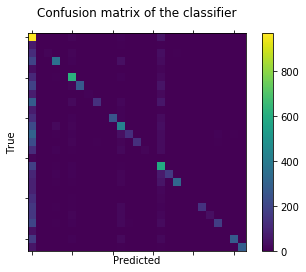

In [62]:
from sklearn.metrics import confusion_matrix

# labels = ['business', 'health']
cm = confusion_matrix(y_test, predicted)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted')
plt.ylabel('True')
# plt.show()

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         211       0.22      0.92      0.35      1050
         214       0.00      0.00      0.00        85
         221       1.00      0.06      0.12       193
         222       0.78      0.56      0.65       639
         231       0.00      0.00      0.00        48
         241       0.77      0.80      0.78       770
         242       0.95      0.51      0.66       531
         245       1.00      0.08      0.16       118
         311       0.89      0.26      0.40       528
         312       0.00      0.00      0.00        90
         313       0.99      0.58      0.73       433
         321       0.57      0.59      0.58       724
         331       0.88      0.24      0.38       532
         341       0.96      0.31      0.46       428
         342       1.00      0.07      0.12       200
         353       0.00      0.00      0.00        15
         354       0.46      0.73      0.56       806
         356       0.99    